In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Importing the dataset

In [3]:
df = pd.read_csv("emotion_sentimen_dataset.csv")
df.shape

(18727, 3)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral


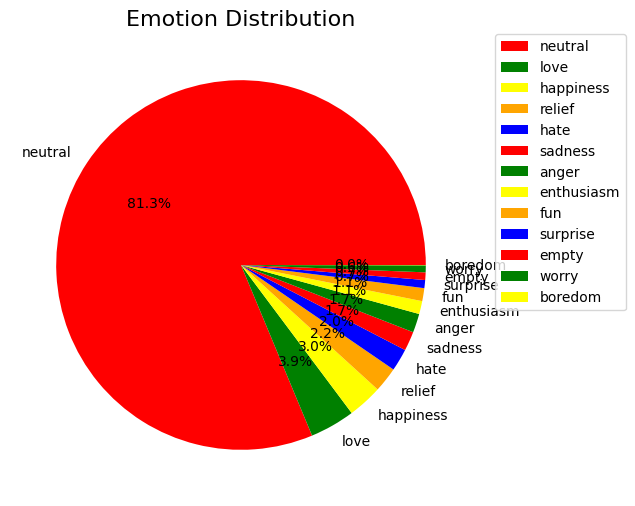

In [5]:
emotion_counts = df['Emotion'].value_counts()
labels = emotion_counts.index.to_list()
colors = ['red', 'green', 'yellow', 'orange', 'blue']

plt.figure(figsize=(12, 6))

plt.pie(emotion_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title("Emotion Distribution", fontsize=16)
plt.show()

# Preprocessing

In [9]:
df.drop_duplicates(inplace=True)
df

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral
...,...,...
18722,i appreciate the passion but since the vocal r...,relief
18723,i was feeling eternally optimistic really good...,neutral
18724,i feel cute cute cute,neutral
18725,i can play the game at midnight and feel like ...,neutral


In [ ]:
# Lowercasing
df['text'] = df['text'].str.lower()
df = df.reset_index(drop=True)
df

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral
...,...,...
27667,ive finished only my second day of school and ...,empty
27668,i never want tippy to feel the pain of not tru...,love
27669,i feel its quite unfortunate how the internet ...,neutral
27670,i dont see myself in the chaos or stop to talk...,neutral


In [11]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

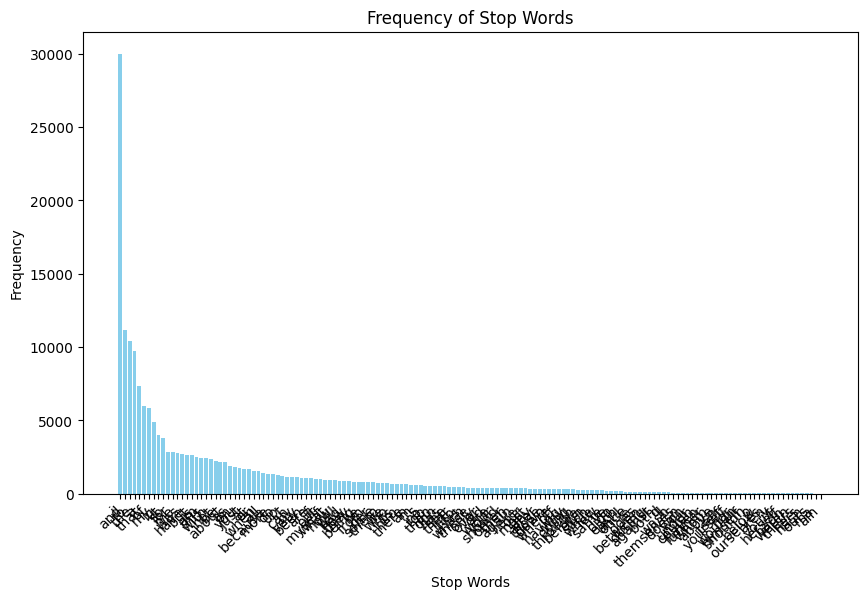

In [13]:
from collections import Counter

# Tokenize and count stop words
stop_words = set(stopwords.words('english'))
stop_words_count = Counter([word for text in df['text'] for word in text.split() if word in stop_words])

# Sort the dictionary by value
stop_words_count = dict(sorted(stop_words_count.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(stop_words_count.keys(), stop_words_count.values(), color='skyblue')
plt.xlabel('Stop Words')
plt.ylabel('Frequency')
plt.title('Frequency of Stop Words')
plt.xticks(rotation=45, ha='right')
plt.show()

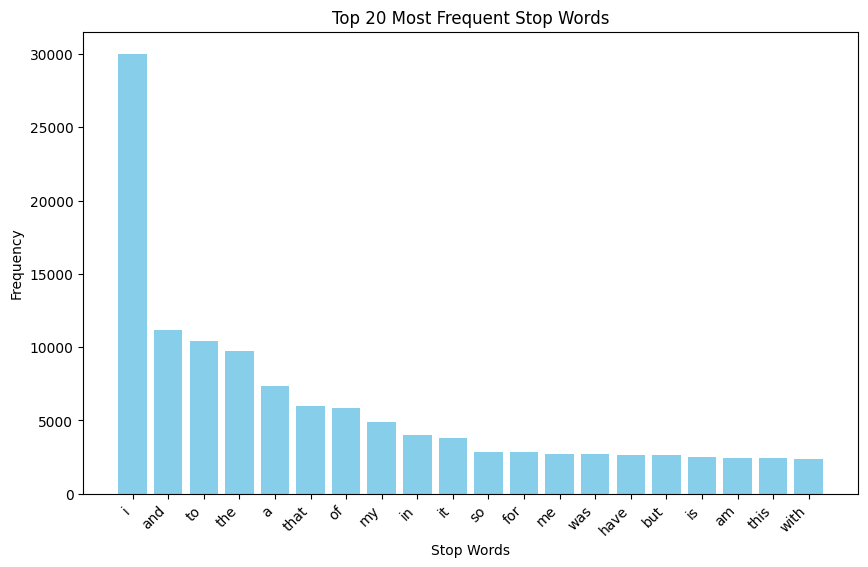

In [15]:
from collections import Counter

# Tokenize and count stop words
stop_words = set(stopwords.words('english'))
stop_words_count = Counter([word for text in df['text'] for word in text.split() if word in stop_words])

# Sort the dictionary by value
stop_words_count = dict(sorted(stop_words_count.items(), key=lambda item: item[1], reverse=True))

# Select the top 20 frequent stop words
stop_words_count_top20 = {k: stop_words_count[k] for k in list(stop_words_count)[:20]}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(stop_words_count_top20.keys(), stop_words_count_top20.values(), color='skyblue')
plt.xlabel('Stop Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Stop Words')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
# Removing punctuation, stop words, and special characters
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)
    return processed_text

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [17]:
df

,text,Emotion,cleaned_text
0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,neutral,im full life feel appalled
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feelings think afraid acce...
3,ive been really angry with r and i feel like a...,anger,ive really angry r feel like idiot trusting fi...
4,i feel suspicious if there is no one outside l...,neutral,feel suspicious one outside like rapture happe...
...,...,...,...
18722,i appreciate the passion but since the vocal r...,relief,appreciate passion since vocal release alligat...
18723,i was feeling eternally optimistic really good...,neutral,feeling eternally optimistic really good every...
18724,i feel cute cute cute,neutral,feel cute cute cute
18725,i can play the game at midnight and feel like ...,neutral,play game midnight feel like took walk sunshin...


In [18]:
# Lemmatization
def lemmatization(text):
  tokens = word_tokenize(text)
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
  # Join tokens back into text
  processed_text = ' '.join(lemmatized_tokens)
  return processed_text

df['lem_text'] = df['cleaned_text'].apply(lemmatization)

In [ ]:
df

,text,Emotion,cleaned_text,lem_text
0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,neutral,im full life feel appalled,im full life feel appalled
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feelings think afraid acce...,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,anger,ive really angry r feel like idiot trusting fi...,ive really angry r feel like idiot trusting fi...
4,i feel suspicious if there is no one outside l...,neutral,feel suspicious one outside like rapture happe...,feel suspicious one outside like rapture happe...
...,...,...,...,...
27667,ive finished only my second day of school and ...,empty,ive finished second day school im already feel...,ive finished second day school im already feel...
27668,i never want tippy to feel the pain of not tru...,love,never want tippy feel pain trusting love,never want tippy feel pain trusting love
27669,i feel its quite unfortunate how the internet ...,neutral,feel quite unfortunate internet used leak albu...,feel quite unfortunate internet used leak albu...
27670,i dont see myself in the chaos or stop to talk...,neutral,dont see chaos stop talk much feeling lost,dont see chaos stop talk much feeling lost


In [19]:
# Lemmatize verbs
def lemmatization(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]  # 'v' for verb
    # Join tokens back into text
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['lem_text'] = df['lem_text'].apply(lemmatization)
df

,text,Emotion,cleaned_text,lem_text
0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,neutral,im full life feel appalled,im full life feel appal
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feelings think afraid acce...,sit write start dig feel think afraid accept p...
3,ive been really angry with r and i feel like a...,anger,ive really angry r feel like idiot trusting fi...,ive really angry r feel like idiot trust first...
4,i feel suspicious if there is no one outside l...,neutral,feel suspicious one outside like rapture happe...,feel suspicious one outside like rapture happe...
...,...,...,...,...
18722,i appreciate the passion but since the vocal r...,relief,appreciate passion since vocal release alligat...,appreciate passion since vocal release alligat...
18723,i was feeling eternally optimistic really good...,neutral,feeling eternally optimistic really good every...,feel eternally optimistic really good everything
18724,i feel cute cute cute,neutral,feel cute cute cute,feel cute cute cute
18725,i can play the game at midnight and feel like ...,neutral,play game midnight feel like took walk sunshin...,play game midnight feel like take walk sunshin...


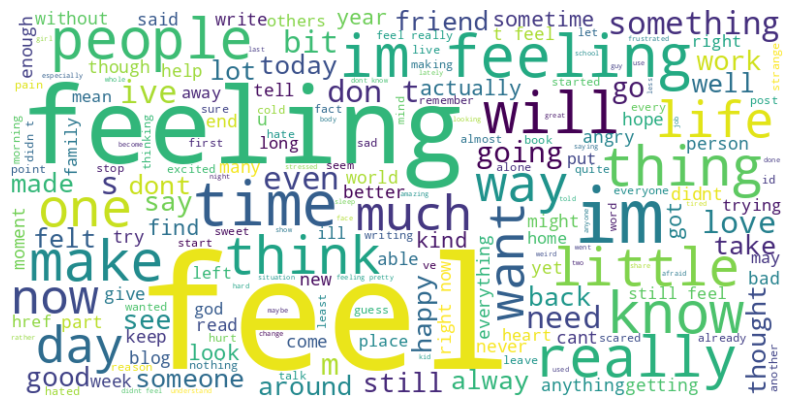

In [26]:
from wordcloud import WordCloud

# Concatenate all preprocessed text into one string
all_text = ' '.join(df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

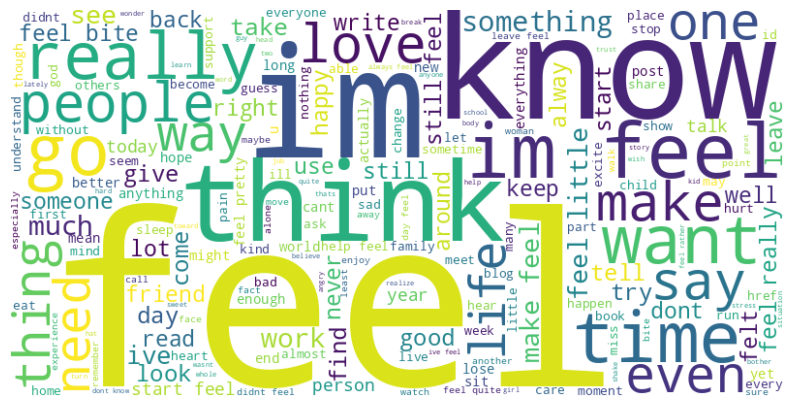

In [25]:
from wordcloud import WordCloud

# Concatenate all preprocessed text into one string
all_text = ' '.join(df['lem_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.isnull().sum()

text            0
Emotion         1
cleaned_text    0
lem_text        0
dtype: int64

In [ ]:
df.drop(columns=['cleaned_text'], inplace=True)

In [ ]:
df

,text,Emotion,lem_text
0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,neutral,im full life feel appal
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feel think afraid accept p...
3,ive been really angry with r and i feel like a...,anger,ive really angry r feel like idiot trust first...
4,i feel suspicious if there is no one outside l...,neutral,feel suspicious one outside like rapture happe...
...,...,...,...
27667,ive finished only my second day of school and ...,empty,ive finish second day school im already feel d...
27668,i never want tippy to feel the pain of not tru...,love,never want tippy feel pain trust love
27669,i feel its quite unfortunate how the internet ...,neutral,feel quite unfortunate internet use leak album...
27670,i dont see myself in the chaos or stop to talk...,neutral,dont see chaos stop talk much feel lose


In [ ]:
# prompt: make a csv file of df

df.to_csv('processed_data.csv', index=False)


# Text Analytics

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from gensim import corpora, models

In [ ]:
# df = pd.read_csv("processed_data.csv")
# df

In [ ]:
df.isnull().sum()

text        0
Emotion     1
lem_text    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

text        0
Emotion     0
lem_text    0
dtype: int64

### Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Function for sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the preprocessed text
df['sentiment'] = df['lem_text'].apply(analyze_sentiment)
df

,text,Emotion,lem_text,sentiment
0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...,negative
1,im so full of life i feel appalled,neutral,im full life feel appal,positive
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feel think afraid accept p...,negative
3,ive been really angry with r and i feel like a...,anger,ive really angry r feel like idiot trust first...,negative
4,i feel suspicious if there is no one outside l...,neutral,feel suspicious one outside like rapture happe...,neutral
...,...,...,...,...
27666,i mean keats was back when it rhymed and had a...,neutral,mean keats back rhyme point story rather arrhy...,negative
27667,ive finished only my second day of school and ...,empty,ive finish second day school im already feel d...,negative
27668,i never want tippy to feel the pain of not tru...,love,never want tippy feel pain trust love,positive
27669,i feel its quite unfortunate how the internet ...,neutral,feel quite unfortunate internet use leak album...,negative


In [ ]:
df['sentiment'].value_counts()


sentiment
positive    11826
negative     8562
neutral      7283
Name: count, dtype: int64

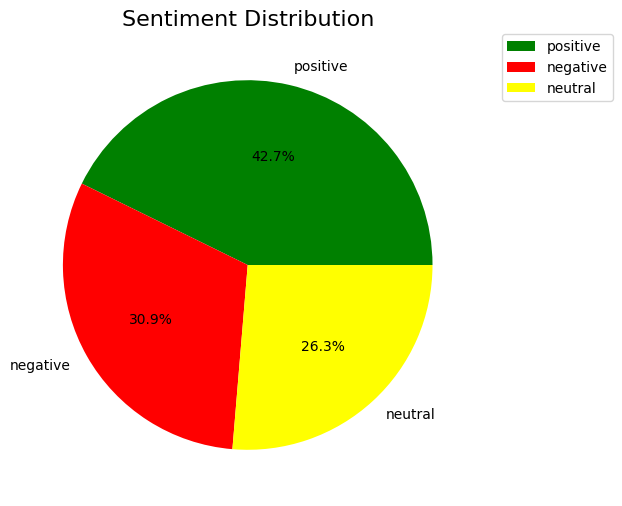

In [ ]:
# Generate a pie chart of 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index.to_list()
colors = ['green', 'red', 'yellow']

plt.figure(figsize=(12, 6))

plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title("Sentiment Distribution", fontsize=16)
plt.show()

### Recurrent Neural Network (RNN) - Long Short-Term Memory (LSTM)

In [ ]:
emotion_df = df[df['Emotion'] != 'neutral']
emotion_df

,text,Emotion,lem_text,sentiment
0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...,negative
3,ive been really angry with r and i feel like a...,anger,ive really angry r feel like idiot trust first...,negative
5,i feel jealous becasue i wanted that kind of l...,love,feel jealous becasue want kind love true conne...,positive
7,i finally fell asleep feeling angry useless an...,worry,finally fell asleep feel angry useless still f...,negative
15,i feel like they hated me since then,hate,feel like hat since,neutral
...,...,...,...,...
27663,i love koh pnan gnan and goa although those tw...,love,love koh pnan gnan goa although two place beco...,positive
27664,i reflect on my practicum experience i find th...,relief,reflect practicum experience find grow conside...,positive
27665,ive just met i am terrible about nervous talki...,hate,ive meet terrible nervous talk even though ive...,negative
27667,ive finished only my second day of school and ...,empty,ive finish second day school im already feel d...,negative


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(emotion_df['lem_text'])
X = tokenizer.texts_to_sequences(emotion_df['lem_text'])
X = pad_sequences(X, maxlen=100)

# Encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(emotion_df['Emotion'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
133/133 [==============================] - 46s 317ms/step - loss: -351.3022 - accuracy: 0.0012 - val_loss: -949.5236 - val_accuracy: 0.0019
Epoch 2/10
133/133 [==============================] - 38s 285ms/step - loss: -2002.1147 - accuracy: 7.0956e-04 - val_loss: -3404.8928 - val_accuracy: 0.0019
Epoch 3/10
133/133 [==============================] - 39s 294ms/step - loss: -5202.2896 - accuracy: 7.0956e-04 - val_loss: -7424.5938 - val_accuracy: 0.0019
Epoch 4/10
133/133 [==============================] - 40s 304ms/step - loss: -9914.9238 - accuracy: 7.0956e-04 - val_loss: -12971.5332 - val_accuracy: 0.0019
Epoch 5/10
133/133 [==============================] - 38s 287ms/step - loss: -16209.5781 - accuracy: 7.0956e-04 - val_loss: -20004.4160 - val_accuracy: 0.0019
Epoch 6/10
133/133 [==============================] - 39s 295ms/step - loss: -23691.8828 - accuracy: 7.0956e-04 - val_loss: -28390.9688 - val_accuracy: 0.0019
Epoch 7/10
133/133 [==============================] - 39s 2

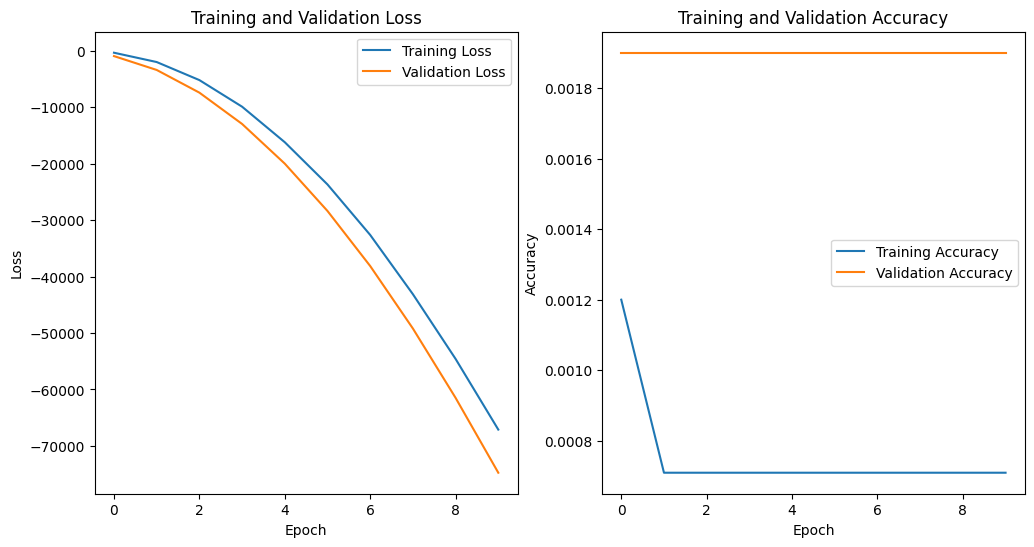

In [6]:
# Get training and validation loss
loss = [-351.3022, -2002.1147, -5202.2896, -9914.9238, -16209.5781, -23691.8828, -32635.7051, -43131.5195, -54598.5469, -67119.9219]
val_loss = [-949.5236, -3404.8928, -7424.5938, -12971.5332, -20004.4160, -28390.9688, -38142.4844, -49214.0664, -61500.3398, -74762.0234]

# Get training and validation accuracy
accuracy = [0.0012, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04]
val_accuracy = [0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019]

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(emotion_df['lem_text'])
X = tokenizer.texts_to_sequences(emotion_df['lem_text'])
X = pad_sequences(X, maxlen=100)

# Encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(emotion_df['Emotion'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
133/133 [==============================] - 86s 590ms/step - loss: 2.1064 - accuracy: 0.2741 - val_loss: 1.6031 - val_accuracy: 0.5095
Epoch 2/10
133/133 [==============================] - 80s 606ms/step - loss: 1.2260 - accuracy: 0.6083 - val_loss: 0.9532 - val_accuracy: 0.7221
Epoch 3/10
133/133 [==============================] - 83s 624ms/step - loss: 0.6008 - accuracy: 0.8198 - val_loss: 0.6077 - val_accuracy: 0.8592
Epoch 4/10
133/133 [==============================] - 81s 610ms/step - loss: 0.2611 - accuracy: 0.9368 - val_loss: 0.4719 - val_accuracy: 0.9045
Epoch 5/10
133/133 [==============================] - 83s 624ms/step - loss: 0.1300 - accuracy: 0.9721 - val_loss: 0.4669 - val_accuracy: 0.9216
Epoch 6/10
133/133 [==============================] - 104s 780ms/step - loss: 0.0925 - accuracy: 0.9837 - val_loss: 0.4472 - val_accuracy: 0.9291
Epoch 7/10
133/133 [==============================] - 81s 610ms/step - loss: 0.0719 - accuracy: 0.9872 - val_loss: 0.4067 - val_a

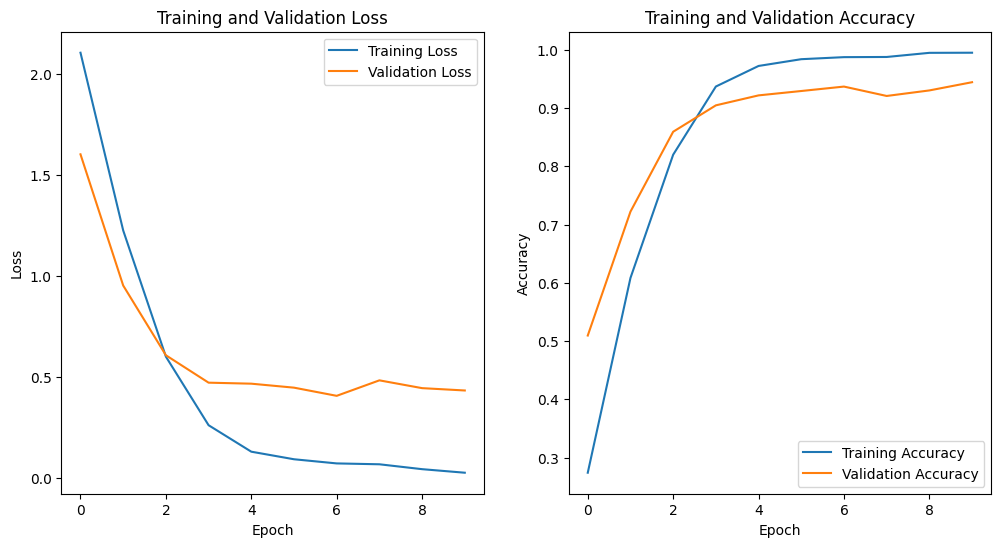

In [7]:
# Get training and validation loss
loss = [2.1064, 1.2260, 0.6008, 0.2611, 0.1300, 0.0925, 0.0719, 0.0676, 0.0434, 0.0258]
val_loss = [1.6031, 0.9532, 0.6077, 0.4719, 0.4669, 0.4472, 0.4067, 0.4834, 0.4448, 0.4332]

# Get training and validation accuracy
accuracy = [0.2741, 0.6083, 0.8198, 0.9368, 0.9721, 0.9837, 0.9872, 0.9875, 0.9946, 0.9948]
val_accuracy = [0.5095, 0.7221, 0.8592, 0.9045, 0.9216, 0.9291, 0.9367, 0.9206, 0.9301, 0.9442]

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Function to preprocess new text data
def preprocess_texts(texts):
    # Tokenize and pad the input texts
    text_sequences = tokenizer.texts_to_sequences(texts)
    text_sequences = pad_sequences(text_sequences, maxlen=100)
    return text_sequences

# Predict emotions using the CNN model for multiple texts
def predict_emotions_lstm(texts):
    text_sequences = preprocess_texts(texts)
    predictions = model.predict(text_sequences)
    predicted_labels = np.argmax(predictions, axis=1)
    predicted_emotions = label_encoder.inverse_transform(predicted_labels)
    return predicted_emotions

# Predict emotions for text in the DataFrame using CNN model
batch_size = 32
num_batches = len(df) // batch_size
if len(df) % batch_size != 0:
    num_batches += 1

predicted_emotions_lstm = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df))
    batch_texts = df['lem_text'].iloc[start_idx:end_idx].tolist()
    batch_predictions = predict_emotions_lstm(batch_texts)
    predicted_emotions_lstm.extend(batch_predictions)

# Add predicted emotions to the DataFrame
df['predicted_emotion_lstm'] = predicted_emotions_lstm

In [ ]:
df

,text,Emotion,lem_text,sentiment,predicted_emotion_lstm
0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...,negative,hate
1,im so full of life i feel appalled,neutral,im full life feel appal,positive,fun
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feel think afraid accept p...,negative,relief
3,ive been really angry with r and i feel like a...,anger,ive really angry r feel like idiot trust first...,negative,anger
4,i feel suspicious if there is no one outside l...,neutral,feel suspicious one outside like rapture happe...,neutral,anger
...,...,...,...,...,...
27666,i mean keats was back when it rhymed and had a...,neutral,mean keats back rhyme point story rather arrhy...,negative,sadness
27667,ive finished only my second day of school and ...,empty,ive finish second day school im already feel d...,negative,empty
27668,i never want tippy to feel the pain of not tru...,love,never want tippy feel pain trust love,positive,love
27669,i feel its quite unfortunate how the internet ...,neutral,feel quite unfortunate internet use leak album...,negative,love


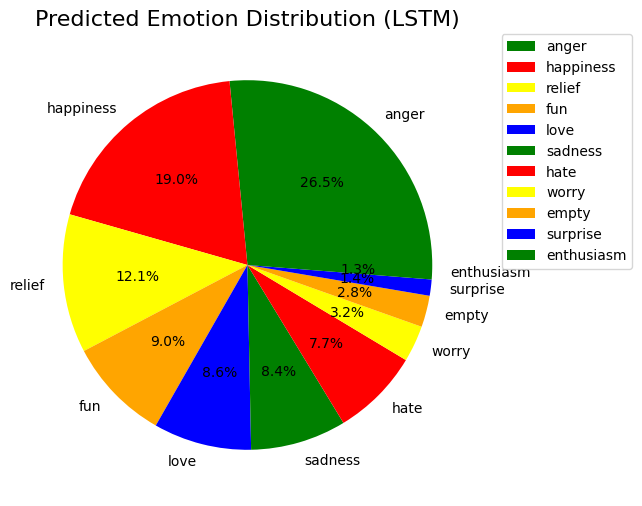

In [ ]:
import matplotlib.pyplot as plt
emotion_counts = df['predicted_emotion_lstm'].value_counts()
labels = emotion_counts.index.to_list()
colors = ['green', 'red', 'yellow', 'orange', 'blue']

plt.figure(figsize=(12, 6))

plt.pie(emotion_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title("Predicted Emotion Distribution (LSTM)", fontsize=16)
plt.show()

Convolutional Neural Network - CNN

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(emotion_df['lem_text'])
X = tokenizer.texts_to_sequences(emotion_df['lem_text'])
X = pad_sequences(X, maxlen=100)

# Encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(emotion_df['Emotion'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/20
133/133 [==============================] - 10s 66ms/step - loss: 2.1510 - accuracy: 0.2694 - val_loss: 1.8250 - val_accuracy: 0.4102
Epoch 2/20
133/133 [==============================] - 8s 57ms/step - loss: 1.4747 - accuracy: 0.5281 - val_loss: 1.1353 - val_accuracy: 0.6484
Epoch 3/20
133/133 [==============================] - 9s 69ms/step - loss: 0.8414 - accuracy: 0.7434 - val_loss: 0.6375 - val_accuracy: 0.7987
Epoch 4/20
133/133 [==============================] - 7s 54ms/step - loss: 0.4689 - accuracy: 0.8385 - val_loss: 0.4366 - val_accuracy: 0.8601
Epoch 5/20
133/133 [==============================] - 9s 66ms/step - loss: 0.2732 - accuracy: 0.9099 - val_loss: 0.3363 - val_accuracy: 0.9301
Epoch 6/20
133/133 [==============================] - 7s 55ms/step - loss: 0.1351 - accuracy: 0.9622 - val_loss: 0.3004 - val_accuracy: 0.9518
Epoch 7/20
133/133 [==============================] - 9s 66ms/step - loss: 0.0770 - accuracy: 0.9801 - val_loss: 0.2906 - val_accuracy: 0.949

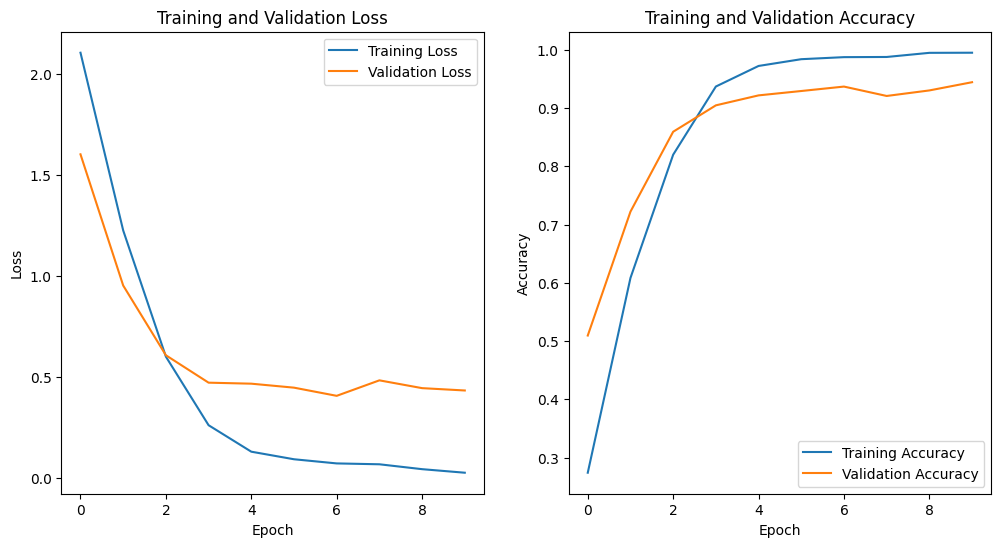

In [8]:
# Loss and accuracy arrays for the CNN model
loss_cnn = [2.1510, 1.4747, 0.8414, 0.4689, 0.2732, 0.1351, 0.0770, 0.0564, 0.0370, 0.0341, 0.0269, 0.0199, 0.0235, 0.0171, 0.0172, 0.0256, 0.0186, 0.0206, 0.0150, 0.0187]
accuracy_cnn = [0.2694, 0.5281, 0.7434, 0.8385, 0.9099, 0.9622, 0.9801, 0.9842, 0.9915, 0.9908, 0.9922, 0.9941, 0.9917, 0.9943, 0.9948, 0.9905, 0.9939, 0.9941, 0.9943, 0.9953]

# Loss and accuracy arrays for the LSTM model
loss_lstm = [-351.3022, -2002.1147, -5202.2896, -9914.9238, -16209.5781, -23691.8828, -32635.7051, -43131.5195, -54598.5469, -67119.9219]
accuracy_lstm = [0.0012, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04, 7.0956e-04]

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Function to preprocess new text data
def preprocess_text(text_list):
    # Tokenize and pad the input text
    text_sequences = tokenizer.texts_to_sequences(text_list)
    text_sequences = pad_sequences(text_sequences, maxlen=100)
    return text_sequences

# Predict emotions using the CNN model for multiple texts
def predict_emotion_cnn(text_list):
    preprocessed_text = preprocess_text(text_list)
    predictions = model.predict(preprocessed_text)
    predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
    return predicted_labels

# Predict emotions for text in the DataFrame using CNN model
batch_size = 32
num_batches = len(df) // batch_size
if len(df) % batch_size != 0:
    num_batches += 1

predicted_emotions_cnn = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df))
    batch_texts = df['lem_text'].iloc[start_idx:end_idx].tolist()
    batch_predictions = predict_emotion_cnn(batch_texts)
    predicted_emotions_cnn.extend(batch_predictions)

from tqdm.notebook import tqdm

# Predict emotions for text in the DataFrame using LSTM model
tqdm.pandas(leave=False)
df['predicted_emotion_cnn'] = predicted_emotions_cnn

In [ ]:
df

,text,Emotion,lem_text,sentiment,predicted_emotion_lstm,predicted_emotion_cnn
0,i seriously hate one subject to death but now ...,hate,seriously hate one subject death feel reluctan...,negative,hate,hate
1,im so full of life i feel appalled,neutral,im full life feel appal,positive,fun,relief
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feel think afraid accept p...,negative,relief,anger
3,ive been really angry with r and i feel like a...,anger,ive really angry r feel like idiot trust first...,negative,anger,anger
4,i feel suspicious if there is no one outside l...,neutral,feel suspicious one outside like rapture happe...,neutral,anger,anger
...,...,...,...,...,...,...
27666,i mean keats was back when it rhymed and had a...,neutral,mean keats back rhyme point story rather arrhy...,negative,sadness,love
27667,ive finished only my second day of school and ...,empty,ive finish second day school im already feel d...,negative,empty,empty
27668,i never want tippy to feel the pain of not tru...,love,never want tippy feel pain trust love,positive,love,love
27669,i feel its quite unfortunate how the internet ...,neutral,feel quite unfortunate internet use leak album...,negative,love,hate


In [ ]:
df.to_csv("final.csv", index=False)

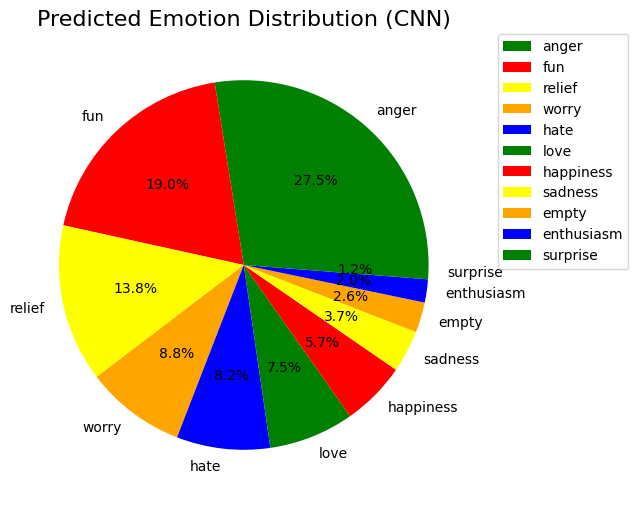

In [ ]:
import matplotlib.pyplot as plt
emotion_counts = df['predicted_emotion_cnn'].value_counts()
labels = emotion_counts.index.to_list()
colors = ['green', 'red', 'yellow', 'orange', 'blue']

plt.figure(figsize=(12, 6))

plt.pie(emotion_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title("Predicted Emotion Distribution (CNN)", fontsize=16)
plt.show()

In [ ]:
are_predictions_same = (df['predicted_emotion_lstm'] == df['predicted_emotion_cnn']).all()
print(f"Are predicted emotions from LSTM and CNN models the same? {are_predictions_same}")

Are predicted emotions from LSTM and CNN models the same? False


In [ ]:
different_outputs = len(df[df['predicted_emotion_lstm'] != df['predicted_emotion_cnn']])
print(f"Number of different outputs between LSTM and CNN models: {different_outputs}")

Number of different outputs between LSTM and CNN models: 17320


### Word Cloud

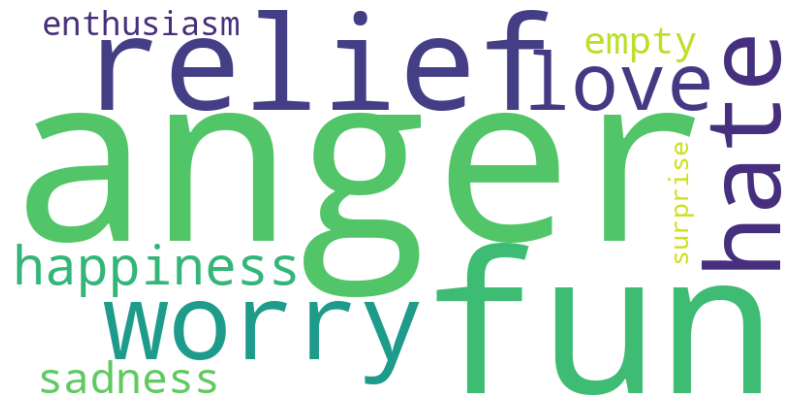

In [ ]:
from wordcloud import WordCloud

# Create a dictionary to count the frequency of each emotion
emotion_counts = df['predicted_emotion_cnn'].value_counts()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(emotion_counts)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
emotion_counts

predicted_emotion_cnn
anger         7615
fun           5267
relief        3818
worry         2426
hate          2264
love          2063
happiness     1564
sadness       1019
empty          732
enthusiasm     561
surprise       342
Name: count, dtype: int64